In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:
DATASET_COLUMNS=['target','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/twitter.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(5)

,target,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [ ]:
df.head()


,target,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [ ]:
df.columns


Index(['target', 'text'], dtype='object')

In [ ]:
print('length of data is', len(df))


length of data is 31962


In [ ]:
df. shape


(31962, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  31962 non-null  int64 
 1   text    31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [ ]:
df.dtypes


target     int64
text      object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))


0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   2
Count of rows in the data is:   31962


In [ ]:
df['target'].unique()


array([0, 1])

In [ ]:

df['target'].nunique()


2

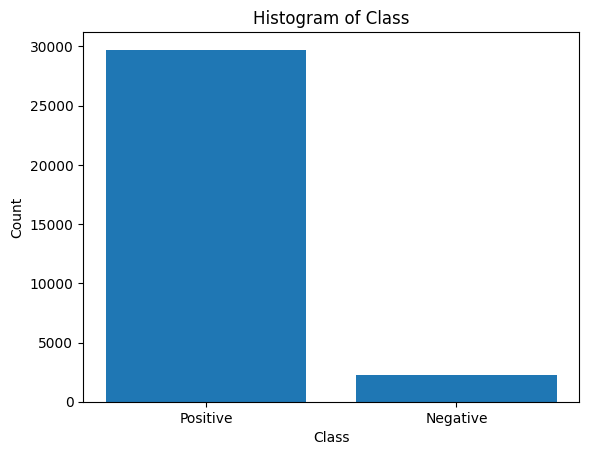

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'positive' and 'negative' are the labels for the classes
target = df['target']
counts = target.value_counts()

plt.bar(['Positive', 'Negative'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
# Separate features (text) and target (sentiment)
X = df['text']
y = df['target']

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Initialize SMOTE
smote = SMOTE()
# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Inverse transform the resampled data to text form
resampled_texts = vectorizer.inverse_transform(X_resampled)

# Map numerical sentiment labels back to text labels
label_mapping = {1: '1', 0: '0'}
y_resampled_text = [label_mapping[label] for label in y_resampled]

# Create DataFrame for resampled data
resampled_data = pd.DataFrame({'text': resampled_texts, 'target': y_resampled_text})

# Print the resampled data
print("Original data:")
print(df)

print("\nResampled data:")
print(resampled_data)


Original data:
       target                                               text
1           0   @user when a father is dysfunctional and is s...
2           0  @user @user thanks for #lyft credit i can't us...
3           0                                bihday your majesty
4           0  #model   i love u take with u all the time in ...
5           0             factsguide: society now    #motivation
...       ...                                                ...
31958       0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31959       0    to see nina turner on the airwaves trying to...
31960       0  listening to sad songs on a monday morning otw...
31961       1  @user #sikh #temple vandalised in in #calgary,...
31962       0                   thank you @user for you follow  

[31962 rows x 2 columns]

Resampled data:
                                                    text target
0      [run, dysfunction, into, kids, his, drags, he,...      0
1      [getthanked, disapointed, p

In [ ]:
def intoString(l):
  return ' '.join(l)

In [ ]:
resampled_data.iloc[:1,0:1]

,text
0,"[run, dysfunction, into, kids, his, drags, he,..."


In [ ]:
# Convert lists of words back into strings for each row
resampled_data['text'] = resampled_data['text'].apply(intoString)

# Print the resampled data with text converted into strings
print("Resampled data with text converted into strings:")
print(resampled_data)


Resampled data with text converted into strings:
                                                    text target
0      run dysfunction into kids his drags he selfish...      0
1      getthanked disapointed pdx in vans wheelchair ...      0
2                                    majesty your bihday      0
3               urã time the all with take love model in      0
4                      motivation now society factsguide      0
...                                                  ...    ...
59435  user his hate won of their be any reading trol...      1
59436  to today will trump send join user the are you...      1
59437  user if you be might libtard sjw liberal politics      1
59438  against education stereotypes mustread user in...      1
59439  and the to make was have been few weeks go loo...      1

[59440 rows x 2 columns]


In [ ]:
# prompt: resample data into df

df = resampled_data


In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,user his hate won of their be any reading trol...,1
59436,to today will trump send join user the are you...,1
59437,user if you be might libtard sjw liberal politics,1
59438,against education stereotypes mustread user in...,1


In [ ]:
df['target'].value_counts()

target
0    29720
1    29720
Name: count, dtype: int64

In [ ]:
df['target'] = df['target'].replace(4,1)


In [ ]:
df['target'].unique()


array(['0', '1'], dtype=object)

In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,user his hate won of their be any reading trol...,1
59436,to today will trump send join user the are you...,1
59437,user if you be might libtard sjw liberal politics,1
59438,against education stereotypes mustread user in...,1


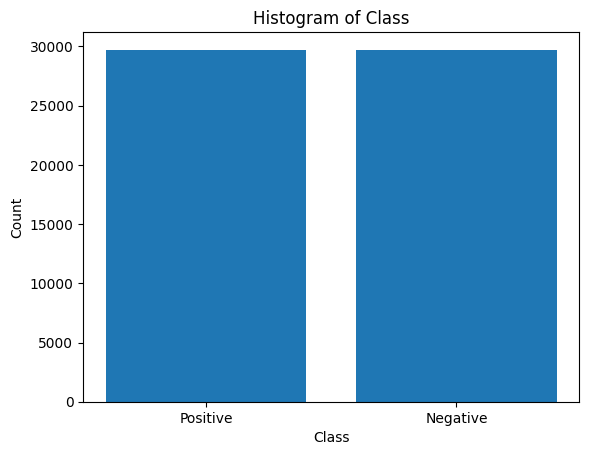

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'positive' and 'negative' are the labels for the classes
target = df['target']
counts = target.value_counts()

plt.bar(['Positive', 'Negative'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Class')
plt.show()


In [ ]:
df.columns

Index(['text', 'target'], dtype='object')

In [ ]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
pip install nltk

In [ ]:
print(df.iloc[1][0])

getthanked disapointed pdx in vans wheelchair offer don they cause use can credit lyft for thanks user


In [ ]:
# prompt: remove the space between letters not between words

df['text'] = df['text'].apply(lambda x: ' '.join(x.split()))


In [ ]:
df

,text,target
0,run dysfunction into kids his drags he selfish...,0
1,getthanked disapointed pdx in vans wheelchair ...,0
2,majesty your bihday,0
3,urã time the all with take love model in,0
4,motivation now society factsguide,0
...,...,...
59435,user his hate won of their be any reading trol...,1
59436,to today will trump send join user the are you...,1
59437,user if you be might libtard sjw liberal politics,1
59438,against education stereotypes mustread user in...,1


In [ ]:
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
df_stop_words = pd.DataFrame(stop_words, columns=["Stop Words"])
print(df_stop_words)


    Stop Words
0      because
1        least
2    meanwhile
3         five
4         with
..         ...
321      alone
322         do
323       such
324       used
325      yours

[326 rows x 1 columns]


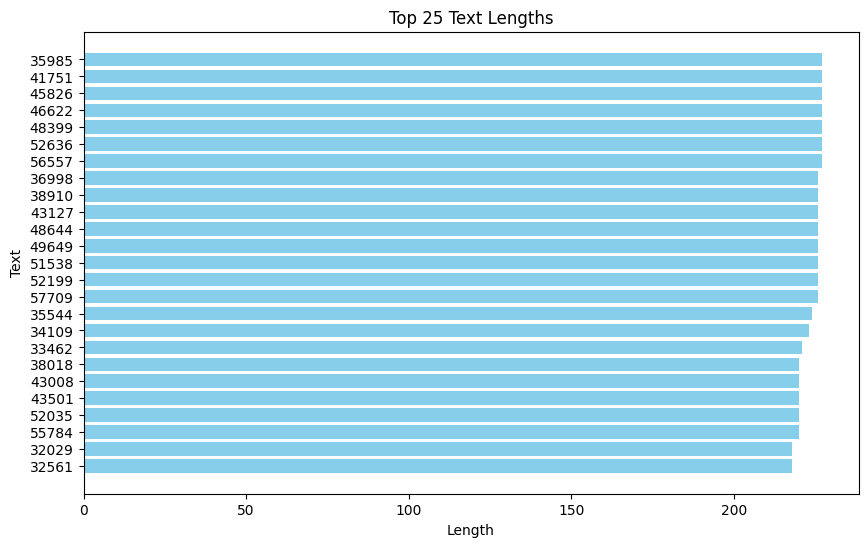

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['text_length'] = df['text'].apply(len)
top_25_lengths = df['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()


In [ ]:
def worddrop(text) :
  text = text. lower()
  text = re. sub('\[.*?\]','', text)
  text = re. sub("\\W", " ", text)
  text = re. sub('https?://\S+|www. \S+','', text)
  text = re. sub('<.*?›+','',text)
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text

In [ ]:
import re
import string


data_copy = df.copy()

data_copy['text'] = data_copy['text'].apply(worddrop)


In [ ]:
data_copy

,text,target,text_length
0,run dysfunction into kids his drags he selfish...,0,87
1,getthanked disapointed pdx in vans wheelchair ...,0,102
2,majesty your bihday,0,19
3,urã time the all with take love model in,0,40
4,motivation now society factsguide,0,33
...,...,...,...
59435,user his hate won of their be any reading trol...,1,164
59436,to today will trump send join user the are you...,1,117
59437,user if you be might libtard sjw liberal politics,1,49
59438,against education stereotypes mustread user in...,1,99


In [ ]:
data_copy.columns
data_copy.shape

(59440, 3)

In [ ]:
import pandas as pd
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Customize spaCy's stopword list to remove "not"
stop_words = set(nlp.Defaults.stop_words)
nlp.Defaults.stop_words = stop_words

def remove_stopwords_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Generate a list of tokens that are not stop words
    filtered_text = [token.text for token in doc if token.text.lower() not in nlp.Defaults.stop_words]
    # Join the tokens back into a single string
    return " ".join(filtered_text)

if __name__ == "__main__":
    # Assuming 'data' is your DataFrame with columns ['text', 'class']

    # Create a new column 'clean_text' and apply remove_stopwords_spacy function to 'text' column
    p = data_copy['text'].apply(remove_stopwords_spacy)
    data_copy['text'] = ' '
    data_copy['text'] = p

    # Print the updated DataFrame
    print(data_copy)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


                                                    text target  text_length
0      run dysfunction kids drags selfish dysfunction...      0           87
1      getthanked disapointed pdx vans wheelchair off...      0          102
2                                         majesty bihday      0           19
3                                    urã time love model      0           40
4                          motivation society factsguide      0           33
...                                                  ...    ...          ...
59435  user hate won reading troll spread platform bu...      1          164
59436  today trump send join user performance lying s...      1          117
59437                  user libtard sjw liberal politics      1           49
59438  education stereotypes mustread user amp stone ...      1           99
59439  weeks look bad ago staff da slow exposed instr...      1          192

[59440 rows x 3 columns]


In [ ]:
print(data_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59440 entries, 0 to 59439
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         59440 non-null  object
 1   target       59440 non-null  object
 2   text_length  59440 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


In [ ]:
data_copy.describe()

,text_length
count,59440.000000
mean,90.547964
std,42.310604
min,0.000000
25%,59.000000
50%,84.000000
75%,116.000000
max,227.000000


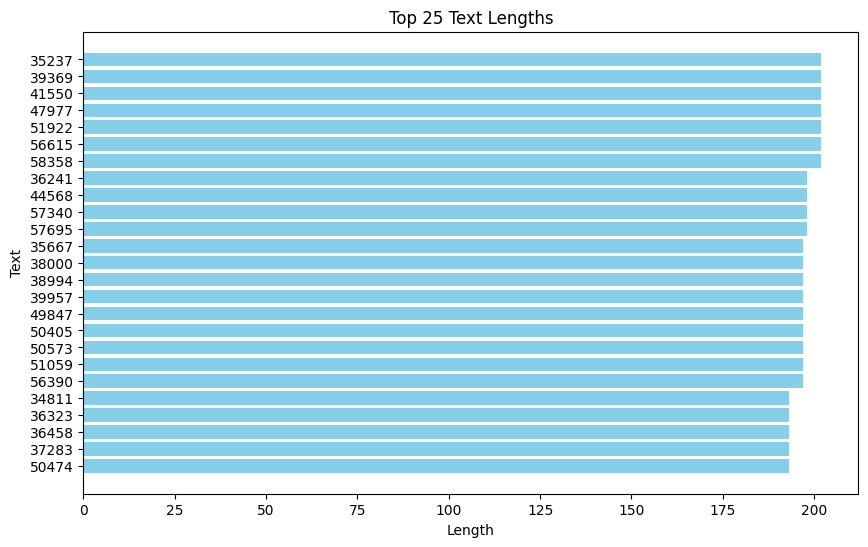

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_copy['text_length'] = data_copy['text'].apply(len)
top_25_lengths = data_copy['text_length'].nlargest(25)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_25_lengths)), top_25_lengths.values, color='skyblue')
plt.yticks(range(len(top_25_lengths)), top_25_lengths.index)
plt.xlabel('Length')
plt.ylabel('Text')
plt.title('Top 25 Text Lengths')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest text at the top
plt.show()

In [ ]:
data_copy.head()

,text,target,text_length
0,run dysfunction kids drags selfish dysfunction...,0,60
1,getthanked disapointed pdx vans wheelchair off...,0,86
2,majesty bihday,0,14
3,urã time love model,0,19
4,motivation society factsguide,0,29


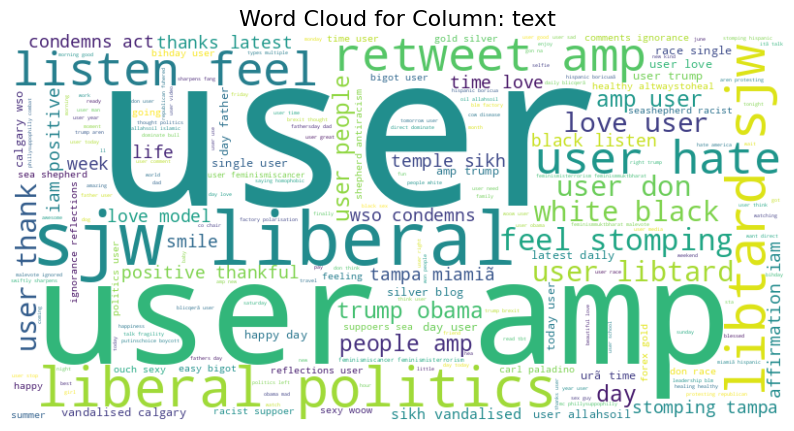

In [ ]:
# Install necessary libraries if you haven't already
# !pip install wordcloud matplotlib

# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given column
def generate_word_cloud(column):
    # Concatenate all text data in the specified column into a single string
    text = ' '.join(data_copy[column].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Column: {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Take input for column name
column_name = "text"

# Check if the column exists in the DataFrame
if column_name in data_copy.columns:
    generate_word_cloud(column_name)
else:
    print("Column not found in DataFrame.")


In [ ]:
x=data_copy['text']
y=data_copy['target']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59435    1
59436    1
59437    1
59438    1
59439    1
Name: target, Length: 59440, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

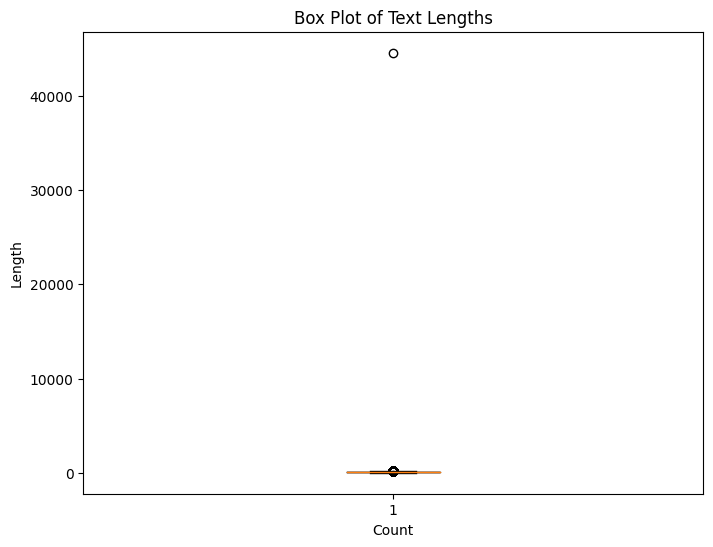

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_train1=x_train.copy()
x_train1['text_length'] = x_train.apply(len)
all_lengths = []
for text in x_train1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


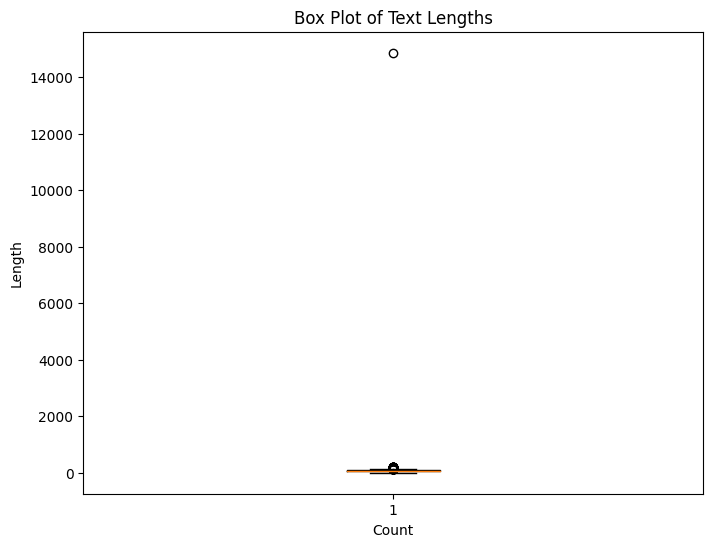

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
x_test1=x_test.copy()
x_test1['text_length'] = x_test.apply(len)
all_lengths = []
for text in x_test1:
    length = len(text)
    all_lengths.append(length)

plt.figure(figsize=(8, 6))
plt.boxplot(all_lengths)
plt.xlabel('Count')
plt.ylabel('Length')
plt.title('Box Plot of Text Lengths')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
xv_train1 = tfidf.fit_transform(x_train)
xv_test1 = tfidf.transform(x_test)

In [ ]:
xv_train1

<44580x32648 sparse matrix of type '<class 'numpy.float64'>'
	with 422090 stored elements in Compressed Sparse Row format>

In [ ]:
data_copy['text']

0        run dysfunction kids drags selfish dysfunction...
1        getthanked disapointed pdx vans wheelchair off...
2                                           majesty bihday
3                                      urã time love model
4                            motivation society factsguide
                               ...                        
59435    user hate won reading troll spread platform bu...
59436    today trump send join user performance lying s...
59437                    user libtard sjw liberal politics
59438    education stereotypes mustread user amp stone ...
59439    weeks look bad ago staff da slow exposed instr...
Name: text, Length: 59440, dtype: object

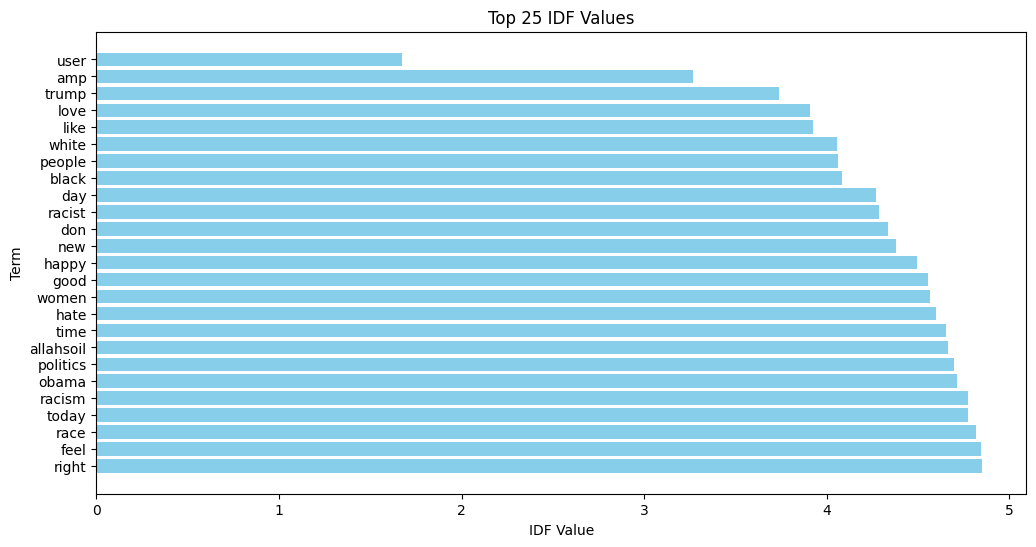

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_copy['text'])
idf_values = tfidf.idf_
terms = tfidf.get_feature_names_out()
term_idf = dict(zip(terms, idf_values))
sorted_terms_idf = sorted(term_idf.items(), key=lambda x: x[1])

top_terms_idf = [term for term, score in sorted_terms_idf]
top_idf_values = [score for term, score in sorted_terms_idf]
plt.figure(figsize=(12, 6))
plt.barh(top_terms_idf[:25], top_idf_values[:25], color='skyblue')
plt.xlabel('IDF Value')
plt.ylabel('Term')
plt.title('Top 25 IDF Values')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(xv_train1,y_train)

LogisticRegression()

In [ ]:
pred_lr1=LR.predict(xv_test1)

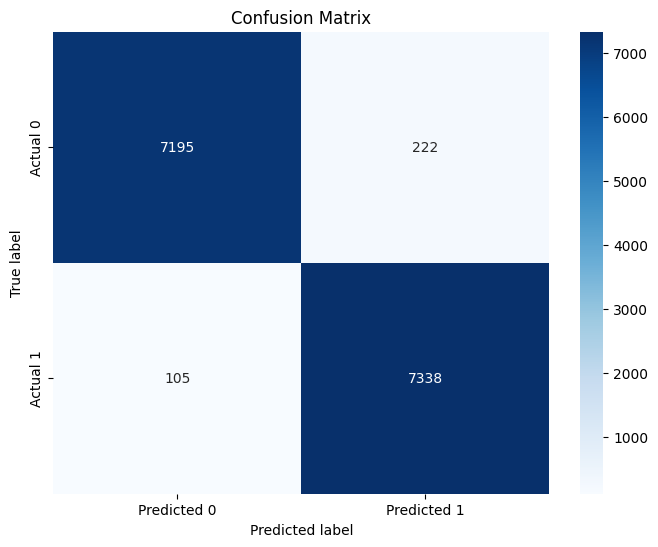

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
accuracy = LR.score(xv_test1, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9779946164199192


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_lr1)

# Print the classification report
print(report)
y_test_lr = y_test
y_pred_lr = pred_lr1

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7417
           1       0.97      0.99      0.98      7443

    accuracy                           0.98     14860
   macro avg       0.98      0.98      0.98     14860
weighted avg       0.98      0.98      0.98     14860



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 3))


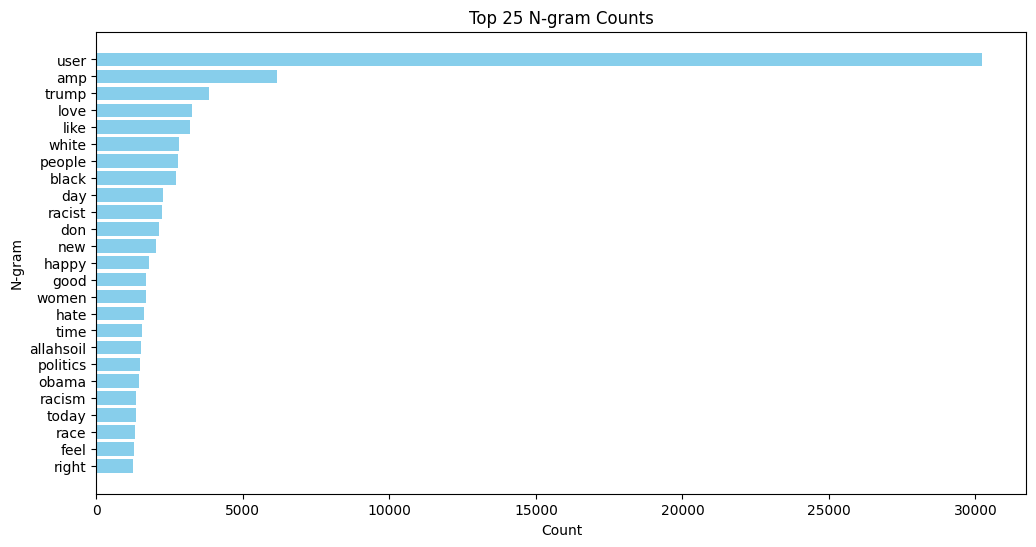

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming 'data_copy' is your DataFrame containing the 'text' column

# Initialize CountVectorizer with ngram_range=(1, 3)
count_vectorizer = CountVectorizer(ngram_range=(1, 3))

# Compute n-gram counts
ngrams_result = count_vectorizer.fit_transform(data_copy['text'])

# Get the feature names (n-grams)
ngrams = count_vectorizer.get_feature_names_out()

# Calculate the sum of counts for each n-gram
ngram_counts = ngrams_result.sum(axis=0).tolist()[0]

# Create a dictionary mapping n-grams to their counts
ngram_count_dict = dict(zip(ngrams, ngram_counts))

# Sort n-grams based on their counts
sorted_ngrams = sorted(ngram_count_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top n-grams and their counts
top_ngrams = [ngram for ngram, count in sorted_ngrams[:25]]
top_counts = [count for ngram, count in sorted_ngrams[:25]]

# Plot the n-gram counts
plt.figure(figsize=(12, 6))
plt.barh(top_ngrams, top_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.title('Top 25 N-gram Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.show()


In [ ]:
xv_train2 = count_vectorizer.fit_transform(x_train)
xv_test2 = count_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train2, y_train)

LogisticRegression()

In [ ]:
pred_lr2 = LR.predict(xv_test2)
accuracy = LR.score(xv_test2, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9804172274562584


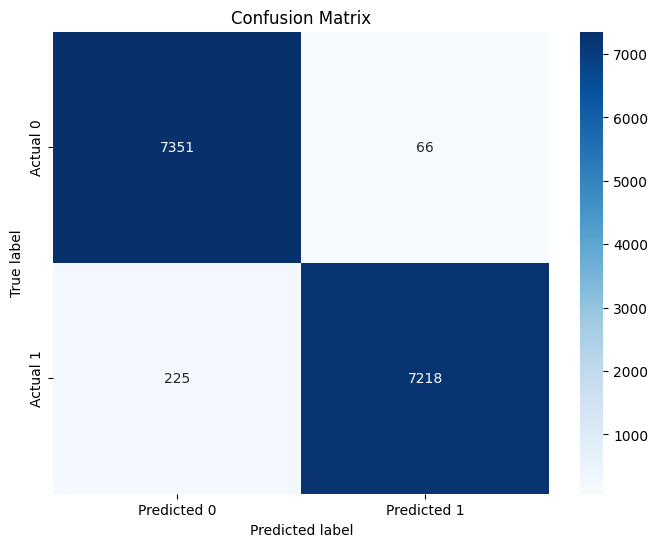

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true labels and predicted labels
true_labels = np.array(y_test)
predicted_labels = np.array(pred_lr2)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer instance and fit it on the training data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x_train)

# Transform the testing data using the same CountVectorizer instance
Y= vectorizer.transform(x_test)

# Apply LDA on the training data
lda = LatentDirichletAllocation(n_components=2, random_state=42)
xv_train3 = lda.fit_transform(X)

# Print the shape of the transformed data
print("Transformed Data shape:", xv_train3.shape)

# Transform the testing data using the trained LDA model
xv_test3 = lda.transform(Y)


Transformed Data shape: (44580, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train3, y_train)

LogisticRegression()

In [ ]:
pred_lr3 = LR.predict(xv_test3)
accuracy = LR.score(xv_test3, y_test)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.7585464333781965


LDA

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming your DataFrame is named df and contains a column named "text"
# Example DataFrame:
# df = pd.DataFrame({'text': ['This is a sample sentence.', 'Another sentence.']})

# Download NLTK resources (only need to do this once)
nltk.download('punkt')

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the text in the "text" column and store the tokenized text in a new column "tokenized_text"
data_copy['tokenized_text'] = data_copy['text'].apply(tokenize_text)

# Print the DataFrame with the new column
print(data_copy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                    text target  text_length  \
0      run dysfunction kids drags selfish dysfunction...      0           60   
1      getthanked disapointed pdx vans wheelchair off...      0           86   
2                                         majesty bihday      0           14   
3                                    urã time love model      0           19   
4                          motivation society factsguide      0           29   
...                                                  ...    ...          ...   
59435  user hate won reading troll spread platform bu...      1          118   
59436  today trump send join user performance lying s...      1           91   
59437                  user libtard sjw liberal politics      1           33   
59438  education stereotypes mustread user amp stone ...      1           85   
59439  weeks look bad ago staff da slow exposed instr...      1          133   

                                       

In [ ]:
!pip install gensim


In [ ]:
import gensim
from sklearn.manifold import TSNE
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
import pandas as pd

# Assuming glove_model is your dictionary containing GloVe vectors
words = []
vectors = []
label=[]
class_array = np.array(data_copy['target'])
# Assuming data_copy is your DataFrame and tokenized_text is a column name
c=0
for token in data_copy['tokenized_text']:
    for word in token:
        if word in glove_model:
            words.append(word)
            label.append(class_array[c])
            vectors.append(glove_model[word])
    c+=1

# Create DataFrame after populating words and vectors
word_vector_df = pd.DataFrame({'word': words, 'vector': vectors,'label': label})


In [ ]:
word_vector_df

,word,vector,label
0,run,"[0.35216, 0.38333, 0.0468, 0.50003, 0.22831, 0...",0
1,dysfunction,"[0.085652, 0.28442, 0.51399, 0.2945, -0.15092,...",0
2,kids,"[-0.16475, 0.023265, 0.086147, 0.37598, -0.059...",0
3,drags,"[0.15459, -0.02819, 0.17474, 0.26569, 0.29201,...",0
4,selfish,"[0.060503, -0.33554, 0.38146, 0.19051, 0.94402...",0
...,...,...,...
482808,paying,"[-0.17606, 0.11422, 0.47282, 0.58485, 0.058993...",1
482809,council,"[0.025874, -0.23942, 0.28381, -0.29139, 0.6197...",1
482810,deaths,"[0.3398, 0.51875, 0.71519, -0.34988, -0.56484,...",1
482811,blamed,"[1.1447, 0.29246, 0.43463, 0.041102, -0.16206,...",1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming words, vectors, and labels are already populated
# Assuming vectors is a list of word embeddings, and labels is a list of corresponding labels

# Convert vectors and labels lists to numpy arrays
X = np.array(vectors)
y = np.array(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7101788469703717


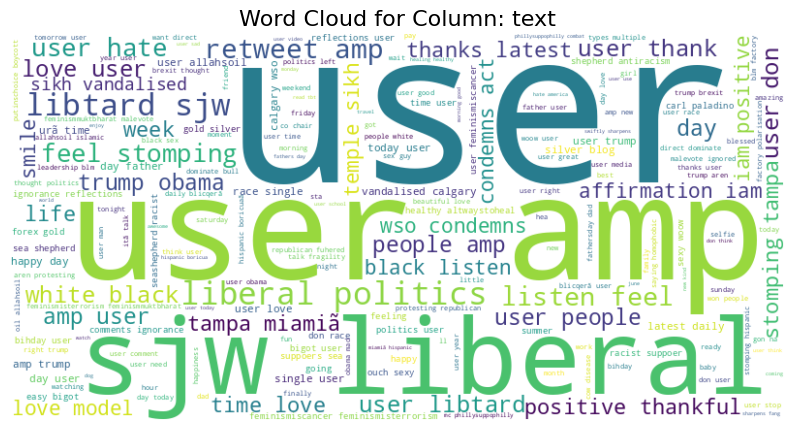

In [ ]:
# Install necessary libraries if you haven't already
# !pip install wordcloud matplotlib

# Import the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate word cloud for a given column
def generate_word_cloud(column):
    # Concatenate all text data in the specified column into a single string
    text = ' '.join(data_copy[column].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Column: {column}', fontsize=16)
    plt.axis('off')
    plt.show()

# Take input for column name
column_name = "text"

# Check if the column exists in the DataFrame
if column_name in data_copy.columns:
    generate_word_cloud(column_name)
else:
    print("Column not found in DataFrame.")


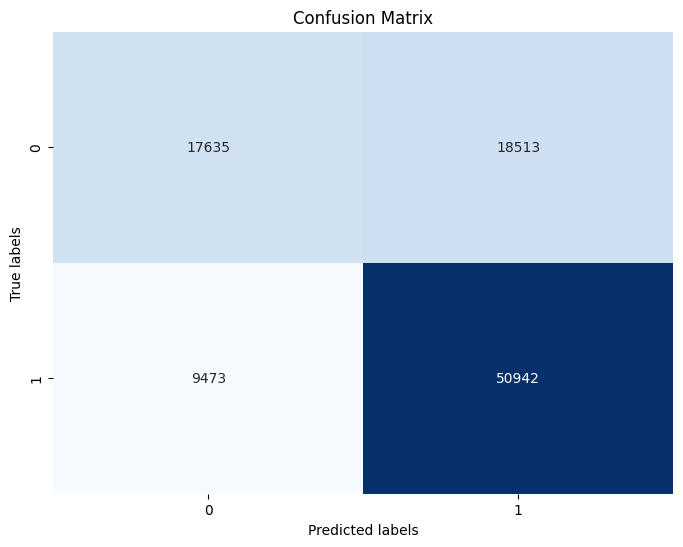

In [ ]:
# Draw confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Xgboost

In [ ]:

import pandas as pd

# Assuming your DataFrame is named 'df' and the column you want to change is named 'target'
df['target'] = df['target'].replace({'1': 1, '0': 0}).astype(int)

# Print the DataFrame to verify the changes
print(df)
x=data_copy['text']
y=data_copy['target']

                                                    text  target  text_length
0      run dysfunction into kids his drags he selfish...       0           87
1      getthanked disapointed pdx in vans wheelchair ...       0          102
2                                    majesty your bihday       0           19
3               urã time the all with take love model in       0           40
4                      motivation now society factsguide       0           33
...                                                  ...     ...          ...
59435  user his hate won of their be any reading trol...       1          164
59436  to today will trump send join user the are you...       1          117
59437  user if you be might libtard sjw liberal politics       1           49
59438  against education stereotypes mustread user in...       1           99
59439  and the to make was have been few weeks go loo...       1          192

[59440 rows x 3 columns]


Accuracy: 0.9424629878869448
Precision: 0.9679351656095843
Recall: 0.9162775183455637
F1 Score: 0.9413982179575052
Confusion Matrix:
[[5710  182]
 [ 502 5494]]


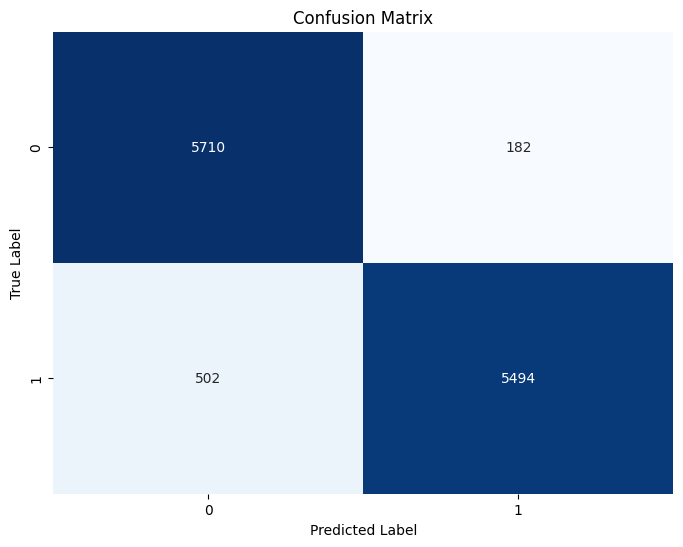

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_test_xg = y_test
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_count = count_vectorizer.transform(X_test)

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_count, y_train)

# Predict
y_pred = model.predict(X_test_count)
y_pred = y_pred.astype(int)
y_pred_xg2 = y_pred
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5892
           1       0.97      0.92      0.94      5996

    accuracy                           0.94     11888
   macro avg       0.94      0.94      0.94     11888
weighted avg       0.94      0.94      0.94     11888



In [ ]:
# Convert target variable to integer type


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming X contains your features and y contains your target labels

# Convert X_train and X_test to pandas Series or list of strings
X_train_texts = [str(x) for x in X_train]
X_test_texts = [str(x) for x in X_test]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)

y_test = y_test.astype(int)
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_texts).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test_texts).toarray()

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)
y_pred = y_pred.astype(int)
y_pred_xg1 = y_pred
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9352288021534321


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5892
           1       0.95      0.92      0.93      5996

    accuracy                           0.94     11888
   macro avg       0.94      0.94      0.94     11888
weighted avg       0.94      0.94      0.94     11888



Accuracy: 0.9791386271870794
Precision: 0.9674690956408588
Recall: 0.9919946631087392
F1 Score: 0.9795783926218709
Confusion Matrix:
[[5692  200]
 [  48 5948]]


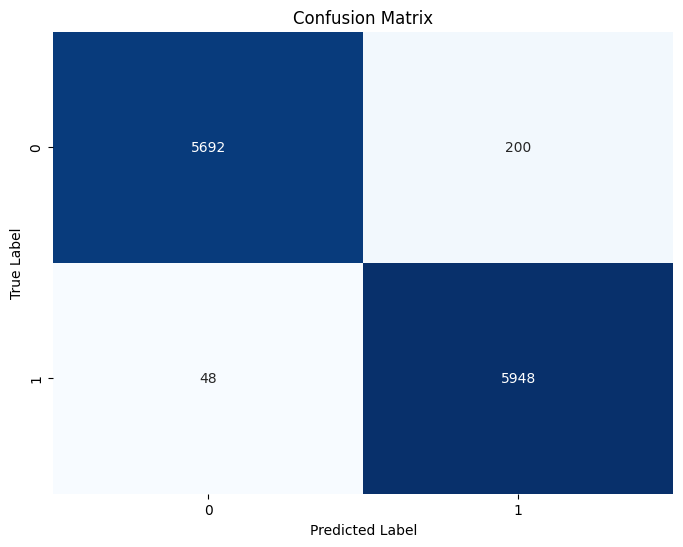

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[doc.split() for doc in X_train], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train([doc.split() for doc in X_train], total_examples=len(X_train), epochs=10)

# Function to convert documents to Word2Vec vectors
def document_vector(doc):
    words = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    if len(words) > 0:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Convert documents to Word2Vec vectors
X_train_word2vec = np.array([document_vector(doc) for doc in X_train])
X_test_word2vec = np.array([document_vector(doc) for doc in X_test])

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_word2vec, y_train)

# Predict
y_pred = model.predict(X_test_word2vec)
y_pred = y_pred.astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install glove

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for glove
  Running setup.py clean for glove
Failed to build glove
ERROR: Could not build wheels for glove, which is required to install pyproject.toml-based projects


In [ ]:
!ls path_to_glove_file

ls: cannot access 'path_to_glove_file': No such file or directory


In [ ]:
!ls -l path_to_glove_file/glove.6B.100d.txt

ls: cannot access 'path_to_glove_file/glove.6B.100d.txt': No such file or directory


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import KeyedVectors
import numpy as np

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Load pre-trained GloVe embeddings
glove_file = 'path_to_glove_file/glove.6B.100d.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# Function to convert documents to GloVe vectors
def document_vector(doc):
    words = [word for word in doc.split() if word in glove_model.key_to_index]
    if len(words) > 0:
        return np.mean(glove_model[words], axis=0)
    else:
        return np.zeros(glove_model.vector_size)

# Convert documents to GloVe vectors
X_train_glove = np.array([document_vector(doc) for doc in X_train])
X_test_glove = np.array([document_vector(doc) for doc in X_test])

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_glove, y_train)

# Predict
y_pred = model.predict(X_test_glove)
y_pred = y_pred.astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_glove_file/glove.6B.100d.txt'

Random Forest

In [ ]:
x = data_copy['text']
y = data_copy['target']

Accuracy on test data with Random Forest: 0.9873485868102289


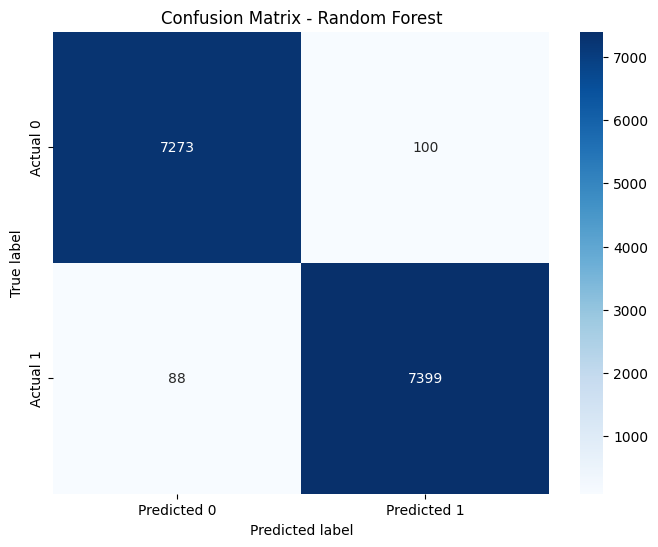

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x contains your text data and y contains corresponding labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_test_rf = y_test
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform train data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform test data using the fitted vectorizer
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Initialize Random Forest classifier
RF = RandomForestClassifier()

# Train the model
RF.fit(x_train_tfidf, y_train)

# Make predictions on test data
pred_rf = RF.predict(x_test_tfidf)
pred_rf = pred_rf.astype(int)
y_pred_rf = pred_rf
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy on test data with Random Forest:", accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_rf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7373
           1       0.99      0.99      0.99      7487

    accuracy                           0.99     14860
   macro avg       0.99      0.99      0.99     14860
weighted avg       0.99      0.99      0.99     14860



Accuracy on test data with Random Forest and CountVectorizer: 0.9872812920592193


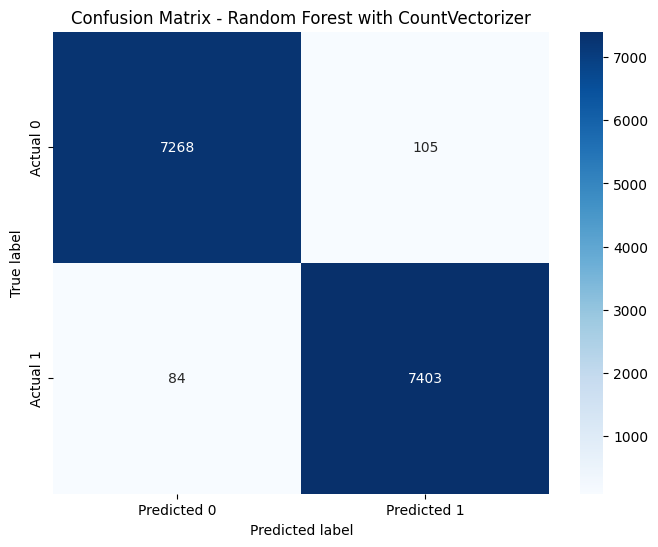

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit CountVectorizer and transform train data
x_train_count = count_vectorizer.fit_transform(x_train)

# Transform test data using the fitted vectorizer
x_test_count = count_vectorizer.transform(x_test)

# Initialize Random Forest classifier
RF_count = RandomForestClassifier()

# Train the model
RF_count.fit(x_train_count, y_train)

# Make predictions on test data
pred_rf_count = RF_count.predict(x_test_count)

# Calculate accuracy
accuracy_rf_count = accuracy_score(y_test, pred_rf_count)
print("Accuracy on test data with Random Forest and CountVectorizer:", accuracy_rf_count)

# Compute confusion matrix
cm_rf_count = confusion_matrix(y_test, pred_rf_count)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_count, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest with CountVectorizer')
plt.show()


In [ ]:
# prompt: write  a code for perfomance metrics

from sklearn.metrics import classification_report
# Get the classification report
report = classification_report(y_test, pred_rf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7373
           1       0.99      0.99      0.99      7487

    accuracy                           0.99     14860
   macro avg       0.99      0.99      0.99     14860
weighted avg       0.99      0.99      0.99     14860



Accuracy on test data with Random Forest using Word2Vec: 0.9742934051144011


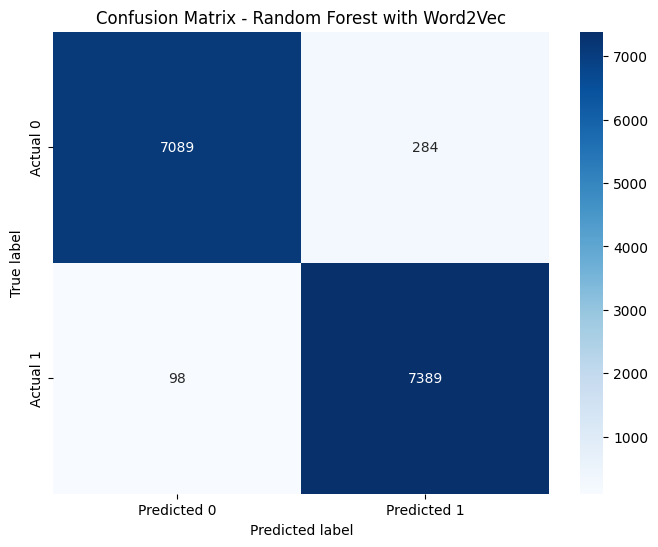

In [ ]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x contains your text data and y contains corresponding labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[doc.split() for doc in x_train], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train([doc.split() for doc in x_train], total_examples=len(x_train), epochs=10)

# Function to convert documents to Word2Vec vectors
def document_vector(doc):
    words = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    if len(words) > 0:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Convert documents to Word2Vec vectors
x_train_word2vec = np.array([document_vector(doc) for doc in x_train])
x_test_word2vec = np.array([document_vector(doc) for doc in x_test])

# Initialize Random Forest classifier
RF = RandomForestClassifier()

# Train the model
RF.fit(x_train_word2vec, y_train)

# Make predictions on test data
pred_rf = RF.predict(x_test_word2vec)
pred_rf = pred_rf.astype(int)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy on test data with Random Forest using Word2Vec:", accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest with Word2Vec')
plt.show()


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.8 MB/s eta 0:00:00


Learning rate set to 0.05359
0:	learn: 0.6295046	total: 216ms	remaining: 3m 35s
1:	learn: 0.5738580	total: 318ms	remaining: 2m 38s
2:	learn: 0.5310823	total: 464ms	remaining: 2m 34s
3:	learn: 0.4919699	total: 573ms	remaining: 2m 22s
4:	learn: 0.4558827	total: 667ms	remaining: 2m 12s
5:	learn: 0.4258206	total: 753ms	remaining: 2m 4s
6:	learn: 0.4007847	total: 819ms	remaining: 1m 56s
7:	learn: 0.3785364	total: 880ms	remaining: 1m 49s
8:	learn: 0.3574461	total: 944ms	remaining: 1m 43s
9:	learn: 0.3395151	total: 1.02s	remaining: 1m 40s
10:	learn: 0.3254853	total: 1.08s	remaining: 1m 36s
11:	learn: 0.3120608	total: 1.14s	remaining: 1m 33s
12:	learn: 0.2994244	total: 1.21s	remaining: 1m 31s
13:	learn: 0.2877436	total: 1.31s	remaining: 1m 32s
14:	learn: 0.2778874	total: 1.37s	remaining: 1m 30s
15:	learn: 0.2687140	total: 1.45s	remaining: 1m 29s
16:	learn: 0.2608098	total: 1.54s	remaining: 1m 29s
17:	learn: 0.2527327	total: 1.65s	remaining: 1m 29s
18:	learn: 0.2463182	total: 1.74s	remaining: 1

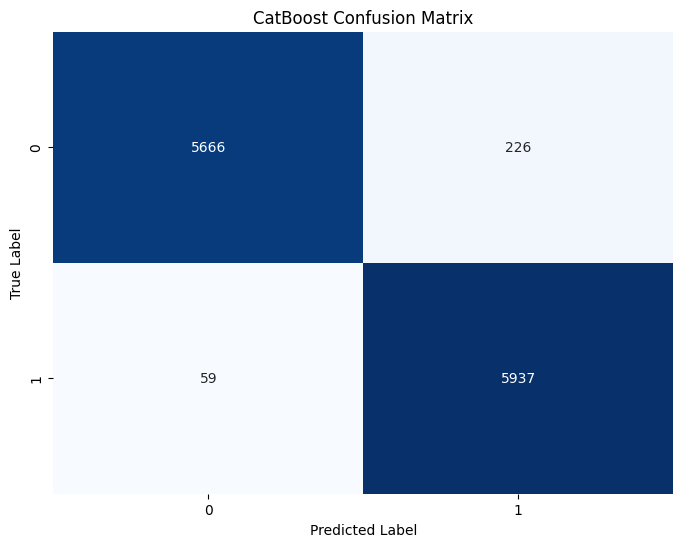

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=[doc.split() for doc in X_train], vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train([doc.split() for doc in X_train], total_examples=len(X_train), epochs=10)

# Function to convert documents to Word2Vec vectors
def document_vector(doc):
    """
    Transform a document into a Word2Vec vector by averaging the word vectors.
    """
    words = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    if len(words) > 0:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no words found

# Convert documents to Word2Vec vectors
X_train_word2vec = np.array([document_vector(doc) for doc in X_train])
X_test_word2vec = np.array([document_vector(doc) for doc in X_test])

# Train CatBoost classifier with Word2Vec features
model_catboost = CatBoostClassifier()
model_catboost.fit(X_train_word2vec, y_train)

# Predict with CatBoost
y_pred_catboost = model_catboost.predict(X_test_word2vec)
y_pred_catboost = y_pred_catboost.astype(int)

# Calculate evaluation metrics for CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Print metrics for CatBoost
print("CatBoost Metrics:")
print("Accuracy:", accuracy_catboost)
print("Precision:", precision_catboost)
print("Recall:", recall_catboost)
print("F1 Score:", f1_catboost)
print("Confusion Matrix:")
print(conf_matrix_catboost)

# Plot confusion matrix for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_catboost.classes_, yticklabels=model_catboost.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Confusion Matrix')
plt.show()


Learning rate set to 0.05359
0:	learn: 0.6677552	total: 148ms	remaining: 2m 27s
1:	learn: 0.6473423	total: 255ms	remaining: 2m 7s
2:	learn: 0.6283507	total: 366ms	remaining: 2m 1s
3:	learn: 0.6123969	total: 472ms	remaining: 1m 57s
4:	learn: 0.5980287	total: 580ms	remaining: 1m 55s
5:	learn: 0.5836995	total: 711ms	remaining: 1m 57s
6:	learn: 0.5732129	total: 850ms	remaining: 2m
7:	learn: 0.5619026	total: 979ms	remaining: 2m 1s
8:	learn: 0.5510967	total: 1.13s	remaining: 2m 4s
9:	learn: 0.5419477	total: 1.27s	remaining: 2m 6s
10:	learn: 0.5341638	total: 1.44s	remaining: 2m 9s
11:	learn: 0.5272876	total: 1.59s	remaining: 2m 10s
12:	learn: 0.5199146	total: 1.69s	remaining: 2m 8s
13:	learn: 0.5143167	total: 1.83s	remaining: 2m 8s
14:	learn: 0.5086185	total: 2.01s	remaining: 2m 11s
15:	learn: 0.5029467	total: 2.24s	remaining: 2m 17s
16:	learn: 0.4977765	total: 2.48s	remaining: 2m 23s
17:	learn: 0.4931337	total: 2.64s	remaining: 2m 24s
18:	learn: 0.4881414	total: 2.8s	remaining: 2m 24s
19:	le

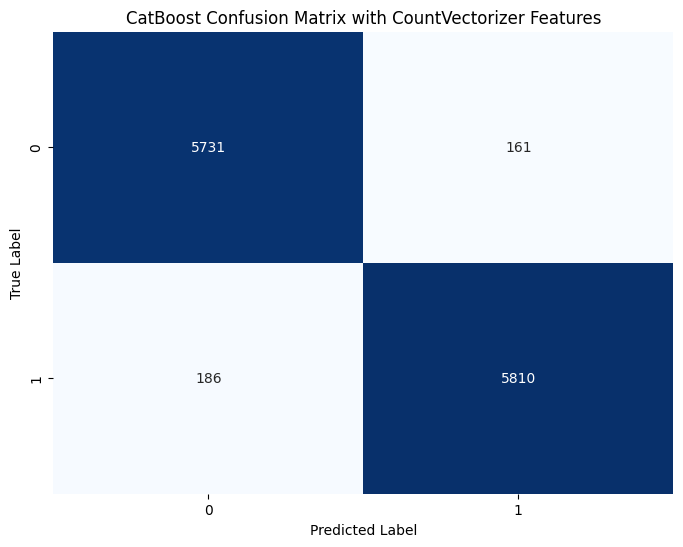

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_count = count_vectorizer.transform(X_test)

# Train CatBoost classifier with CountVectorizer features
model_catboost_count = CatBoostClassifier()
model_catboost_count.fit(X_train_count, y_train)

# Predict with CatBoost using CountVectorizer features
y_pred_catboost_count = model_catboost_count.predict(X_test_count)
y_pred_catboost_count = y_pred_catboost_count.astype(int)

# Calculate evaluation metrics for CatBoost with CountVectorizer features
accuracy_catboost_count = accuracy_score(y_test, y_pred_catboost_count)
precision_catboost_count = precision_score(y_test, y_pred_catboost_count)
recall_catboost_count = recall_score(y_test, y_pred_catboost_count)
f1_catboost_count = f1_score(y_test, y_pred_catboost_count)
conf_matrix_catboost_count = confusion_matrix(y_test, y_pred_catboost_count)

# Print metrics for CatBoost with CountVectorizer features
print("CatBoost Metrics with CountVectorizer:")
print("Accuracy:", accuracy_catboost_count)
print("Precision:", precision_catboost_count)
print("Recall:", recall_catboost_count)
print("F1 Score:", f1_catboost_count)
print("Confusion Matrix:")
print(conf_matrix_catboost_count)

# Plot confusion matrix for CatBoost with CountVectorizer features
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost_count, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_catboost_count.classes_, yticklabels=model_catboost_count.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Confusion Matrix with CountVectorizer Features')
plt.show()


Learning rate set to 0.05359
0:	learn: 0.6654660	total: 490ms	remaining: 8m 9s
1:	learn: 0.6397930	total: 807ms	remaining: 6m 42s
2:	learn: 0.6174943	total: 1.2s	remaining: 6m 37s
3:	learn: 0.6000366	total: 1.47s	remaining: 6m 6s
4:	learn: 0.5840389	total: 1.81s	remaining: 6m
5:	learn: 0.5694042	total: 2.15s	remaining: 5m 57s
6:	learn: 0.5550953	total: 2.48s	remaining: 5m 52s
7:	learn: 0.5420708	total: 2.76s	remaining: 5m 42s
8:	learn: 0.5298843	total: 3.09s	remaining: 5m 39s
9:	learn: 0.5197048	total: 3.43s	remaining: 5m 39s
10:	learn: 0.5113770	total: 4.08s	remaining: 6m 6s
11:	learn: 0.5031101	total: 4.46s	remaining: 6m 7s
12:	learn: 0.4929646	total: 4.67s	remaining: 5m 55s
13:	learn: 0.4866592	total: 4.88s	remaining: 5m 43s
14:	learn: 0.4803320	total: 5.09s	remaining: 5m 34s
15:	learn: 0.4736137	total: 5.31s	remaining: 5m 26s
16:	learn: 0.4676499	total: 5.52s	remaining: 5m 19s
17:	learn: 0.4621815	total: 5.72s	remaining: 5m 11s
18:	learn: 0.4561916	total: 5.92s	remaining: 5m 5s
19:

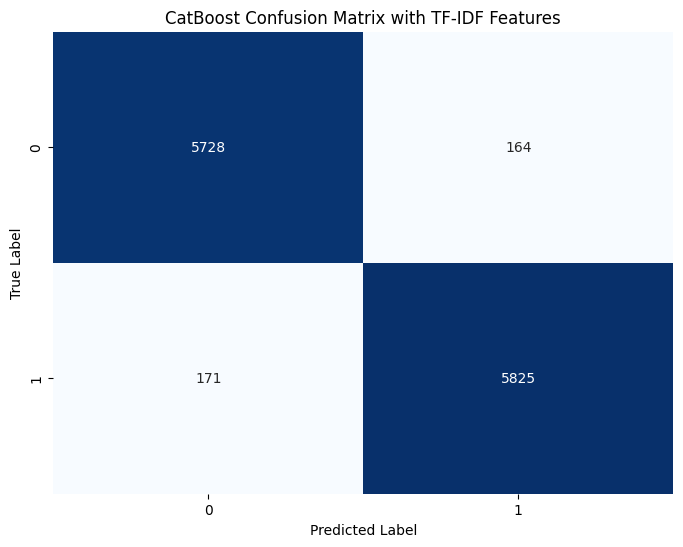

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'x' is your feature data and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed

# Fit TF-IDF vectorizer and transform train data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train CatBoost classifier with TF-IDF features
model_catboost_tfidf = CatBoostClassifier()
model_catboost_tfidf.fit(X_train_tfidf, y_train)

# Predict with CatBoost using TF-IDF features
y_pred_catboost_tfidf = model_catboost_tfidf.predict(X_test_tfidf)
y_pred_catboost_tfidf = y_pred_catboost_tfidf.astype(int)

# Calculate evaluation metrics for CatBoost with TF-IDF features
accuracy_catboost_tfidf = accuracy_score(y_test, y_pred_catboost_tfidf)
precision_catboost_tfidf = precision_score(y_test, y_pred_catboost_tfidf)
recall_catboost_tfidf = recall_score(y_test, y_pred_catboost_tfidf)
f1_catboost_tfidf = f1_score(y_test, y_pred_catboost_tfidf)
conf_matrix_catboost_tfidf = confusion_matrix(y_test, y_pred_catboost_tfidf)

# Print metrics for CatBoost with TF-IDF features
print("CatBoost Metrics with TF-IDF:")
print("Accuracy:", accuracy_catboost_tfidf)
print("Precision:", precision_catboost_tfidf)
print("Recall:", recall_catboost_tfidf)
print("F1 Score:", f1_catboost_tfidf)
print("Confusion Matrix:")
print(conf_matrix_catboost_tfidf)

# Plot confusion matrix for CatBoost with TF-IDF features
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost_tfidf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_catboost_tfidf.classes_, yticklabels=model_catboost_tfidf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Confusion Matrix with TF-IDF Features')
plt.show()


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


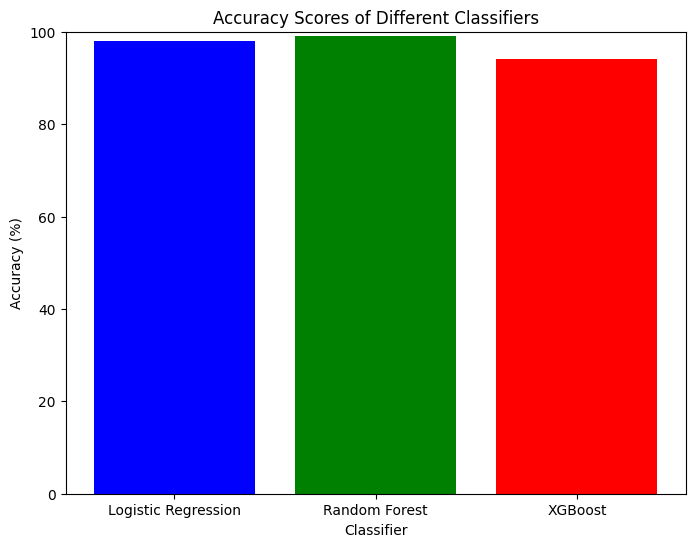

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
classifiers = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [98, 99, 94]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Setting y-axis limit
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

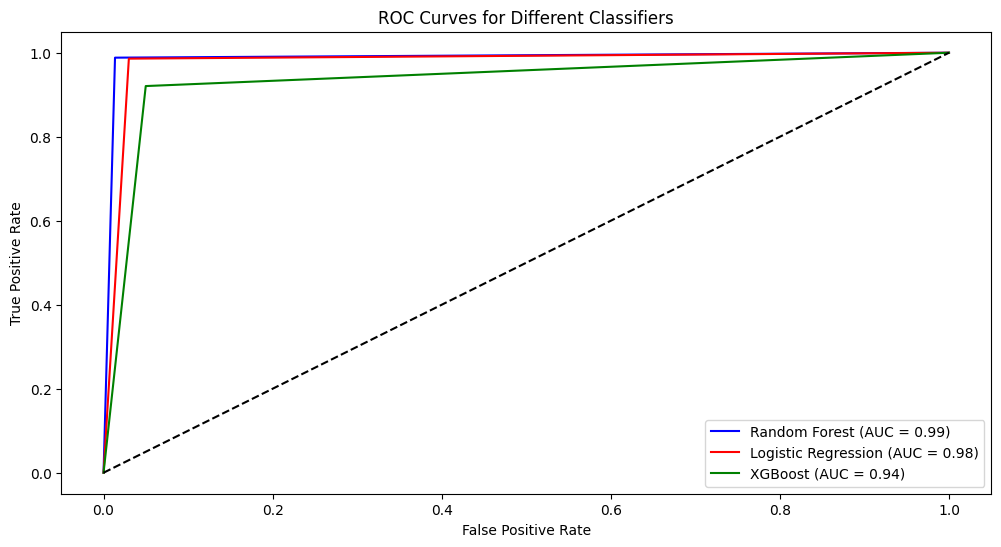

In [ ]:
# prompt: draw the roc curve on three models

import matplotlib.pyplot as plt
# Assuming you have the following data:

# - y_test_rf: True labels for Random Forest predictions
# - pred_rf_proba: Predicted probabilities for Random Forest
# - y_test_lr: True labels for Logistic Regression predictions
# - pred_lr_proba: Predicted probabilities for Logistic Regression
# - y_test_xgb: True labels for XGBoost predictions
# - pred_xgb_proba: Predicted probabilities for XGBoost

# Calculate ROC curves and AUC for each model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
y_test_lr = y_test_lr.astype(int)
y_pred_lr = y_pred_lr.astype(int)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xg, y_pred_xg1)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(12, 6))

plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red', label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_xgb, tpr_xgb, color='green', label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()


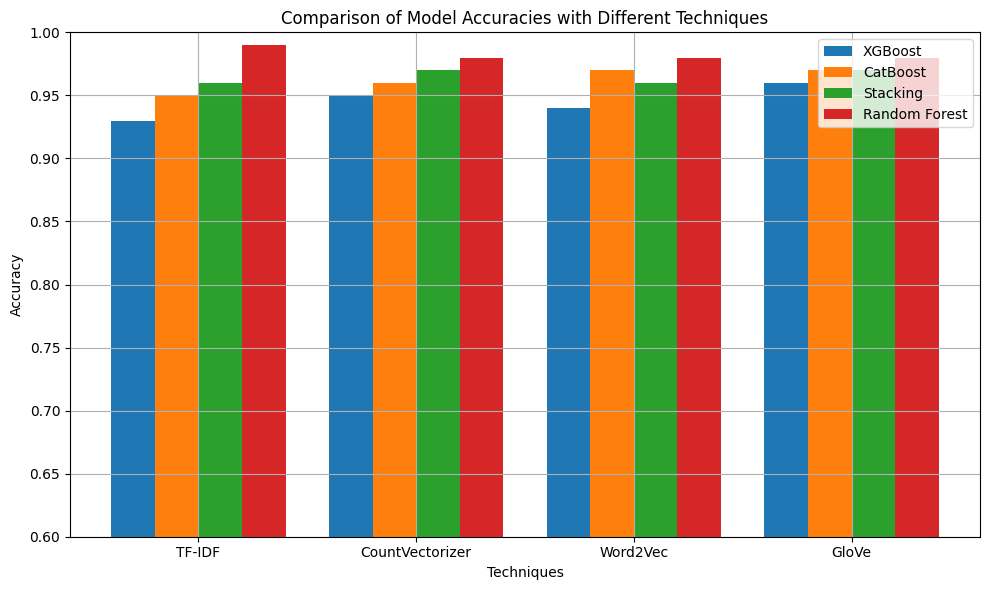

In [ ]:
import matplotlib.pyplot as plt

# Define the techniques and models
techniques = ['TF-IDF', 'CountVectorizer', 'Word2Vec', 'GloVe']
models = ['XGBoost', 'CatBoost', 'Stacking', 'Random Forest']

# Accuracies for each model and technique combination
accuracies = [
    [0.93, 0.95, 0.94, 0.96],  # XGBoost
    [0.95, 0.96, 0.97, 0.97],  # CatBoost
    [0.96, 0.97, 0.96, 0.97],  # Stacking
    [0.99, 0.98, 0.98, 0.98]   # Random Forest
]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(techniques))

for i in range(len(models)):
    plt.bar([x + i * bar_width for x in index], accuracies[i], bar_width, label=models[i])

plt.xlabel('Techniques')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies with Different Techniques')
plt.xticks([x + 1.5 * bar_width for x in index], techniques)
plt.legend()
plt.grid(True)
plt.ylim(0.6, 1)  # Setting y-axis limits from 0.6 to 1
plt.tight_layout()
plt.show()


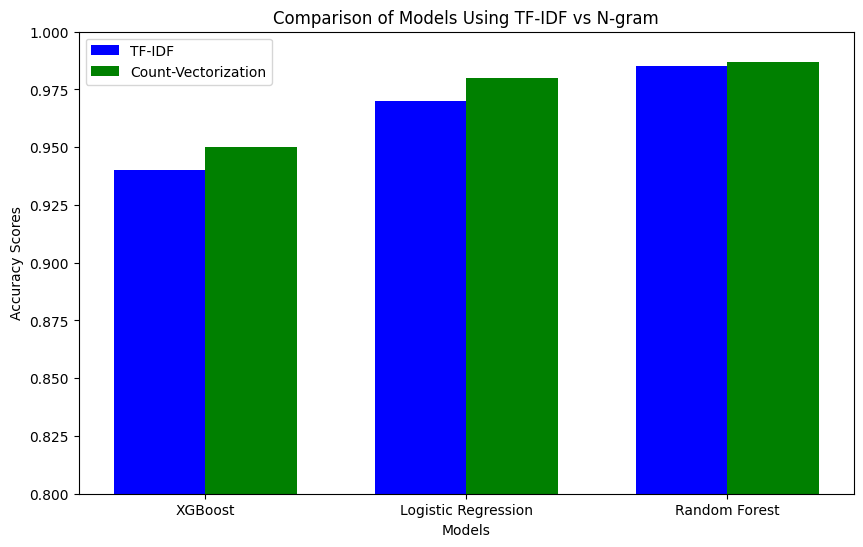

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model with TF-IDF and N-gram
logistic_regression_tfidf_accuracy = 0.97
logistic_regression_ngram_accuracy = 0.98

xgboost_tfidf_accuracy = 0.94
xgboost_ngram_accuracy = 0.95

random_forest_tfidf_accuracy = 0.985
random_forest_ngram_accuracy = 0.987

# Create lists for models and accuracy scores
models = [ 'XGBoost','Logistic Regression', 'Random Forest']
tfidf_accuracies = [xgboost_tfidf_accuracy, logistic_regression_tfidf_accuracy,  random_forest_tfidf_accuracy]
ngram_accuracies = [xgboost_ngram_accuracy, logistic_regression_ngram_accuracy, random_forest_ngram_accuracy]

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create bar graph for model comparison
plt.bar(r1, tfidf_accuracies, color='blue', width=bar_width, label='TF-IDF')
plt.bar(r2, ngram_accuracies, color='green', width=bar_width, label='Count-Vectorization')

plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Comparison of Models Using TF-IDF vs N-gram')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.ylim(0.8, 1.0)  # Adjust ylim if needed
plt.legend()
plt.show()


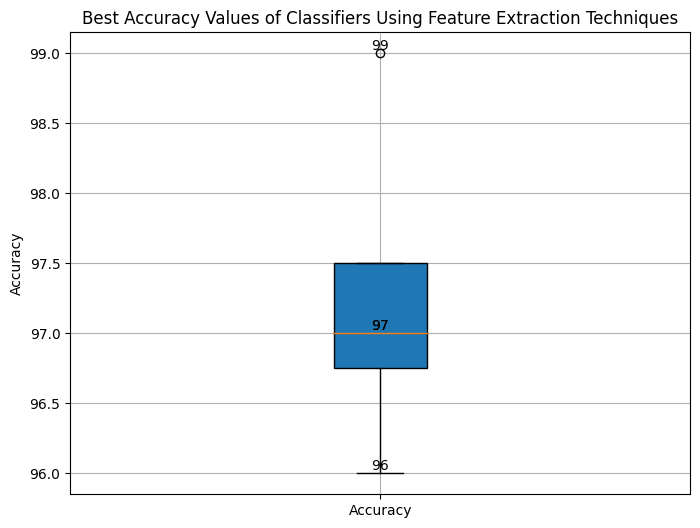

In [ ]:
import matplotlib.pyplot as plt

# Define the data from the table
classifiers = ['XG-Boost', 'CatBoost', 'Stacking', 'Random Forest']
feature_extraction = ['GloVe', 'GloVe', 'Count-Vectorization', 'TF-IDF']
accuracy_values = [96, 97, 97, 99]

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(accuracy_values, patch_artist=True)
plt.xticks([1], ['Accuracy'])
plt.ylabel('Accuracy')
plt.title('Best Accuracy Values of Classifiers Using Feature Extraction Techniques')
plt.grid(True)

# Customizing box colors
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

# Adding labels for each box
for i, txt in enumerate(accuracy_values):
    plt.text(1, accuracy_values[i], str(accuracy_values[i]), horizontalalignment='center', verticalalignment='bottom')

# Displaying the plot
plt.show()
